In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('tables/salaries_2020-2025.csv')

In [5]:
print(df.head())

   work_year experience_level employment_type           job_title  salary  \
0       2025               MI              FT  Research Scientist  208000   
1       2025               MI              FT  Research Scientist  147000   
2       2025               SE              FT  Research Scientist  173000   
3       2025               SE              FT  Research Scientist  117000   
4       2025               MI              FT         AI Engineer  100000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         208000                 US             0   
1             USD         147000                 US             0   
2             USD         173000                 US             0   
3             USD         117000                 US             0   
4             USD         100000                 US           100   

  company_location company_size  
0               US            M  
1               US            M  
2               US  

In [6]:
columns_delete=['work_year', 'experience_level', 'employment_type', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
df = df.drop(columns=columns_delete)
df = df.drop_duplicates()
df = df.sort_values(by='salary_in_usd', ascending=False)
print(df)

                             job_title  salary_in_usd
79867                     AI Architect         800000
13514                    Data Engineer         793136
80710                     Data Analyst         774000
84453                    Data Engineer         750000
81509               Analytics Engineer         750000
...                                ...            ...
39495                       BI Analyst          15107
92999                     Data Analyst          15000
90074               Staff Data Analyst          15000
87863  Business Intelligence Developer          15000
92702       Machine Learning Developer          15000

[28375 rows x 2 columns]


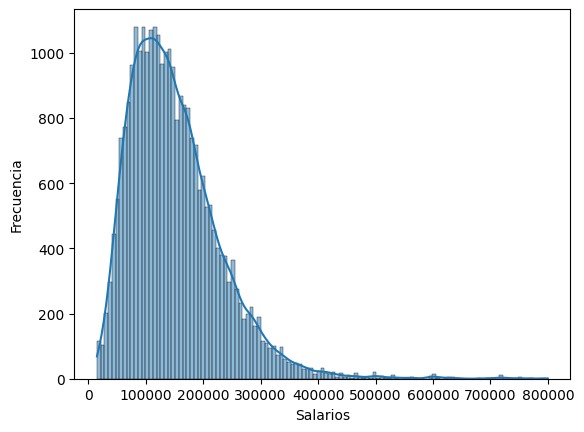

In [7]:
sns.histplot(df['salary_in_usd'], kde=True)

plt.xlabel('Salarios')
plt.ylabel('Frecuencia')

plt.show()

In [9]:
df['log_salary'] = np.log10(df['salary_in_usd'])
log_salary = df['log_salary']

def sturges(data):
    num_data = len(data)
    num_bins = int(np.log2(num_data)) + 1
    return num_bins
def freedman_diaconis(data):
    num_data = len(data)
    irq = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * irq / np.power(num_data, 1/3)
    num_bins = int((np.max(data) -  np.min(data)) / bin_width)  + 1
    return num_bins
    
print(sturges(log_salary), freedman_diaconis(log_salary))
k = 128

15 84


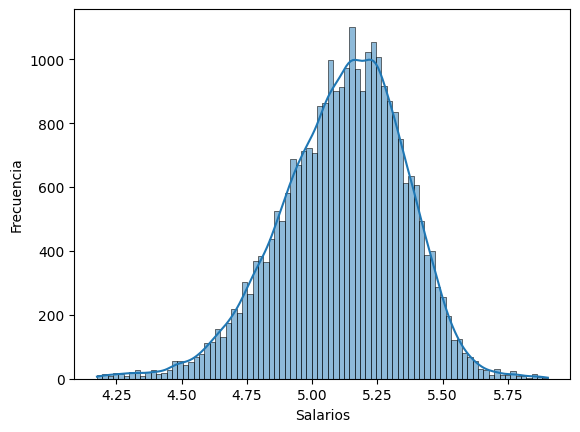

In [11]:
sns.histplot(df['log_salary'], kde=True)

plt.xlabel('Salarios')
plt.ylabel('Frecuencia')

plt.show()

In [10]:
bins = np.linspace(np.min(log_salary), np.max(log_salary), k+1)
real_bins = 10 ** bins
labels = [f'{np.round(real_bins[i], 2)} to {np.round(real_bins[i+1], 2)}' for i in range(k)]

df['salary'] = pd.cut(log_salary, bins=bins, labels=labels, include_lowest=True)
df = df.drop_duplicates()
print(df)

                             job_title  salary_in_usd  log_salary  \
79867                     AI Architect         800000    5.903090   
13514                    Data Engineer         793136    5.899348   
80710                     Data Analyst         774000    5.888741   
84453                    Data Engineer         750000    5.875061   
81509               Analytics Engineer         750000    5.875061   
...                                ...            ...         ...   
39495                       BI Analyst          15107    4.179178   
92999                     Data Analyst          15000    4.176091   
90074               Staff Data Analyst          15000    4.176091   
87863  Business Intelligence Developer          15000    4.176091   
92702       Machine Learning Developer          15000    4.176091   

                       salary  
79867   775528.58 to 800000.0  
13514   775528.58 to 800000.0  
80710  751805.73 to 775528.58  
84453  728808.54 to 751805.73  
81509  7288

In [12]:
columns_delete = ['salary_in_usd', 'log_salary']
df = df.drop('salary_in_usd', axis=1)
df = df.drop('log_salary', axis=1)
df = df.drop_duplicates()
print(df)

                             job_title                  salary
79867                     AI Architect   775528.58 to 800000.0
13514                    Data Engineer   775528.58 to 800000.0
80710                     Data Analyst  751805.73 to 775528.58
84453                    Data Engineer  728808.54 to 751805.73
81509               Analytics Engineer  728808.54 to 751805.73
...                                ...                     ...
65822    Software Development Engineer     15000.0 to 15473.32
39495                       BI Analyst     15000.0 to 15473.32
90074               Staff Data Analyst     15000.0 to 15473.32
87863  Business Intelligence Developer     15000.0 to 15473.32
92702       Machine Learning Developer     15000.0 to 15473.32

[6609 rows x 2 columns]
